# Comptre rendu projet Maths/Info 2
### Clement Desroches & Mathis Bourdin

    
L'objectif de ce projet est d'étudier les schémas numériques et leur dépendance au pas de temps utilisés. La méthode classique utilise un pas de temps fixe mais une adaptation du pas de temps pourrait permettre de controler l'erreur sans connaitre la solution exacte au problème.

Afin de réaliser ce projet nous aurons besoin de plusieurs biblihotèques. Nous commencons donc par les importer.
On définira aussi un décorateur permettant de mesurer la durée d'execution des solveurs.

    - Numpy : Pour ces fonctions mathématiques et sa classe nparray
    - Matplotlib.pyplot : Pour afficher les resultats
    - time : Pour mesurer le temps d'éxécution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

def timeit(name):
    def deco(func):
        def new_func(*args, **kwargs):
            time_init = time()
            res = func(*args, **kwargs)
            print("Le solveur {0} a mis {1:.4f}s a s'executer.".format(name, time()-time_init))
            return res
        return new_func
    return deco

## Pas fixe

In [2]:
@timeit("Euler Explicite")
def solve_euler_explicit(f, x0, dt, t0, tf):
    """ renvoie la solution du schema d'euler explicite 
    Entree : 
    f  : func  -> fonction associee l'equation differentielle (x'(t) = f(x, t)) 
    x0 : list  -> condition intiale sur x 
    dt : float -> pas de temps du schéma
    t0 : float -> origine de l'intervalle de temps
    tf : float -> fin de l'intervalle de temps
    
    sorties :
    t : list -> liste des abscisses de la solution approchée
    x : list -> liste des ordonnées de la solution approchée"""
    x = [x0] # xo pouvant etre a n dimensions
    t = [t0]
    while t0 < tf :
        x0 += dt * np.array(f(t0, x0))
        t0 += dt
        x.append(x0)
        t.append(t0)
    return t, x

Le solveur Euler Explicite a mis 0.0001s a s'executer.
Le solveur Euler Explicite a mis 0.0001s a s'executer.
Le solveur Euler Explicite a mis 0.0002s a s'executer.
Le solveur Euler Explicite a mis 0.0003s a s'executer.
Le solveur Euler Explicite a mis 0.0006s a s'executer.
Le solveur Euler Explicite a mis 0.0012s a s'executer.
Le solveur Euler Explicite a mis 0.0024s a s'executer.


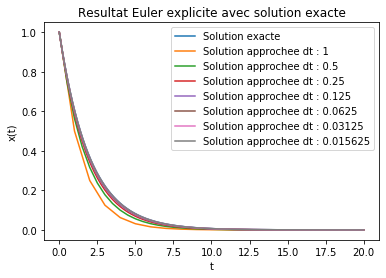

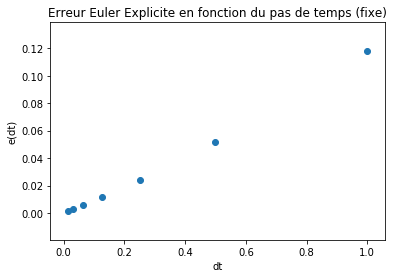

In [3]:
fig, axe = plt.subplots()
axe.set_title("Resultat Euler explicite avec solution exacte")
axe.set_xlabel("t")
axe.set_ylabel("x(t)")

example = lambda t, x : -x/2
solution = lambda t : np.exp(-t/2)
x0, t0, tf = 1, 0, 20
les_dt = [2**-i for i in range(7)]
t = np.arange(t0, tf+les_dt[-1]/2, les_dt[-1])
axe.plot(t, list(map(solution, t)))
erreurs_euler = []

for i in range(len(les_dt)):
    t, x = solve_euler_explicit(example, x0, les_dt[i], t0, tf)
    axe.plot(t, x)
    L =[np.abs(x[i]-solution(t[i])) for i in range(len(x))]
    a = max(L)
    erreurs_euler.append(a)
    
axe.legend(["Solution exacte"]+[f"Solution approchee dt : {dt}" for dt in les_dt])
    
fig, axe = plt.subplots()
axe.set_title("Erreur Euler Explicite en fonction du pas de temps (fixe)")
axe.set_xlabel("dt")
axe.set_ylabel("e(dt)")

plt.scatter(les_dt, erreurs_euler)

plt.show()

In [4]:
@timeit("Heun")
def  solve_heun(f, x0, dt, t0, tf):
    """ renvoie la solution du schema de Heun
     entrées : 
    f  : func  -> fonction associé l'équation différentielle (x'(t) = f(x, t))
    x0 : list  -> condition intiale sur x
    dt : float -> pas de temps du schéma 
    t0 : float -> origine de l'intervalle de temps 
    tf : float -> fin de l'intervalle de temps 
    
    sorties :
    t : list -> liste des abscisses de la solution approchée 
    x : list -> liste des ordonnées de la solution approchée """
    x = [x0] # xo pouvant etre a n dimensions
    t = [t0]
    while t0 < tf :
        x0 += dt/2 * np.array(f(t0, x0) + f(t0 + dt, x0 + dt*f(t0, x0)))
        t0 += dt
        x.append(x0)
        t.append(t0)
    return t, x

Le solveur Heun a mis 0.0001s a s'executer.
Le solveur Heun a mis 0.0001s a s'executer.
Le solveur Heun a mis 0.0002s a s'executer.
Le solveur Heun a mis 0.0004s a s'executer.
Le solveur Heun a mis 0.0008s a s'executer.
Le solveur Heun a mis 0.0016s a s'executer.
Le solveur Heun a mis 0.0032s a s'executer.


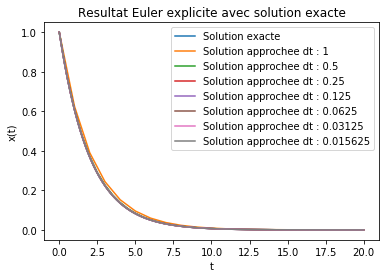

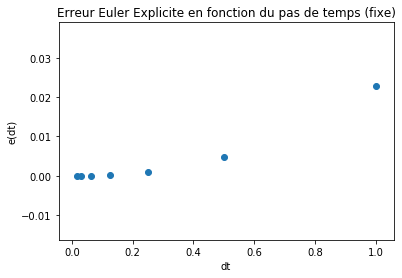

In [5]:
fig, axe = plt.subplots()
axe.set_title("Resultat Euler explicite avec solution exacte")
axe.set_xlabel("t")
axe.set_ylabel("x(t)")

example = lambda t, x : -x/2
solution = lambda t : np.exp(-t/2)
x0, t0, tf = 1, 0, 20
les_dt = [2**-i for i in range(7)]
t = np.arange(t0, tf+les_dt[-1]/2, les_dt[-1])
axe.plot(t, list(map(solution, t)))
erreurs_heun = []

for i in range(len(les_dt)):
    t, x = solve_heun(example, x0, les_dt[i], t0, tf)
    axe.plot(t, x)
    L =[np.abs(x[i]-solution(t[i])) for i in range(len(x))]
    a = max(L)
    erreurs_heun.append(a)
    
axe.legend(["Solution exacte"]+[f"Solution approchee dt : {dt}" for dt in les_dt])
    
fig, axe = plt.subplots()
axe.set_title("Erreur Euler Explicite en fonction du pas de temps (fixe)")
axe.set_xlabel("dt")
axe.set_ylabel("e(dt)")

plt.scatter(les_dt, erreurs_heun)

plt.show()

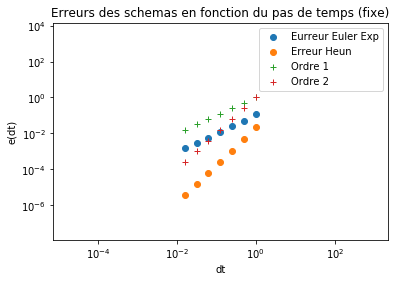

In [7]:
fig, axe = plt.subplots()
axe.set_title("Erreurs des schemas en fonction du pas de temps (fixe)")
axe.set_xlabel("dt")
axe.set_ylabel("e(dt)")
axe.set_xscale("log")
axe.set_yscale("log")

plt.scatter(les_dt, erreurs_euler)
plt.scatter(les_dt, erreurs_heun)
plt.scatter(les_dt, les_dt, linewidth=1, marker = '+')
plt.scatter(les_dt, [dt**2 for dt in les_dt], linewidth=1, marker = '+')

axe.legend(["Eurreur Euler Exp", "Erreur Heun", "Ordre 1", "Ordre 2"])


plt.show()

## Adaptation du pas de temps

Nous allons montrer que $\left \| e^{j+1} \right \| = \Delta t \frac{\left \| f(t_{j+1}, x^{j+1}) - f(t_j, x^j) \right \|}{2} + O(\Delta t_j^3)$

D'après sa définition :
$e^{j+1} = x(t_j) + \int_{t_j}^{t_{j+1}}f(t, x(t))dt - x(t_{j+1})  \\ \hspace{8mm}= x(t_j) + \Delta t(f(t_j, x(t_j)) - x(t_{j+1})  $

Or d'après la formule de Taylor Young à l'ordre 2 : 
$ x(t_{j+1}) = x(t_j) + \Delta t_jx'(t_j) + \frac{\Delta t_j^2}{2}x"(t_j) + O(\Delta t_j^3)$

et comme $x'(t_j) = f(t_j, x(t_j)), \hspace{2mm} x"(t_j) = \frac{d}{dt}f(t_j, x(t_j))$

On obtient donc :
$ e^{j+1} = \frac{\Delta t_j^2}{2}\frac{d}{dt}f(t_j, x(t_j)) + O(\Delta t_j^3) $

Or :
$\frac{d}{dt}f(t_j, x(t_j)) = \partial_tf(t_j, x(t_j)) + \partial_xf(t_j, x(t_j)x'(t_j) \\\hspace{23mm}
=  \partial_tf(t_j, x(t_j)) + \partial_xf(t_j, x(t_j)f(t_j, x(t_j))$

Donc : $e^{j+1} = \frac{\Delta t_j^2}{2} [\partial_tf(t_j, x(t_j)) + \partial_xf(t_j, x(t_j)f(t_j, x(t_j))] + O(\Delta t_j^3) $

Et grâce à la question 1 de l'exercice page 19 :
$ e^{j+1} = \frac{\Delta t_j}{2}[f(t_{j+1}, x(t_j) + \Delta tf(t_j, x(t_j))) - f(t_j, x(t_j))] + O(\Delta t_j^3) $

Ce qui donne finalement : 
$ e^{j+1} = \frac{\Delta t_j}{2}[f(t_{j+1}, x(t_{j+1})) - f(t_j, x(t_j))] + O(\Delta t_j^3) $

En considérant que $ x(t_j) \approx x_j $  et en passant à la norme on obtient le résultat escompté.

Pour la seconde question :
on reprend $ e^{j+1} = \frac{\Delta t_j^2}{2}\frac{d}{dt}f(t_j, x(t_j)) + O(\Delta t_j^3)$

On note $ M = \frac{d}{dt}f(t_j, x(t_j)) \in \mathbb{R} $

Et ainsi : $e^{j+1} = \frac{\Delta t_j^2}{2}M + O(\Delta t_j^3) \\ = O(\Delta t_j^2)$



Ensuite, en approximant, $\mathbf{e^{\, j+1} \simeq \frac {\, x''(t _ {j}) \, }{2} \Delta t ^ {2}} \hspace{5mm}(1)$

Puisqu'on veut $\big | \big | e ^{\, j+1} \big | \big | =Tol _ {abs}$, il suffit de choisir $\Delta t _ {new}$ tel que $\big | \big | \frac {\, x''(t _ {j}) \, }{2} \big | \big | \Delta t _ {new} ^{2} = Tol _ {abs}$ *(2)*.
Or, *(1)* donne $\big | \big | \frac {\, x''(t _ {j}) \, }{2} \big | \big | =  \frac{\big | \big |e^{\, j+1}\big | \big |}{\Delta t ^ {2}}$
  
En combinant on obtient
$$
Tol _ {abs} = \frac{\big | \big |e^{\, j+1}\big | \big |}{\Delta t ^ {2}} \Delta t _ {new} ^{2}
$$
  
<=>

$${
\Delta t _ {new} = \Delta t \sqrt { \frac{Tol _ {abs}}{\big | \big | e ^{\, j+1} \big | \big |} }}
$$

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *

@timeit("Euler Explicite a pas variable")
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs, dts = [t0], [x0], [dt]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t,x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t,x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        dts = vstack([dts,dt])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs, dts)

Le solveur Euler Explicite a pas variable a mis 2.0784s a s'executer.
Erreur pas variable : 30.975367


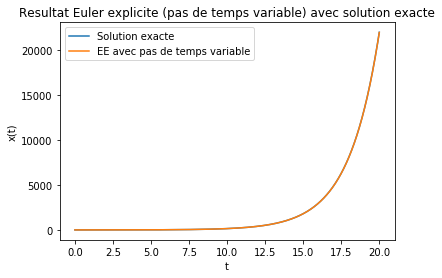

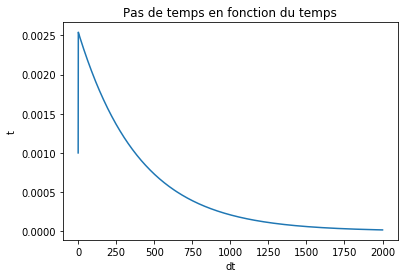

In [9]:
fig, axe = plt.subplots()
axe.set_title("Resultat Euler explicite (pas de temps variable) avec solution exacte")
axe.set_xlabel("t")
axe.set_ylabel("x(t)")

example = lambda  t, x : +x/2
solution = lambda t : np.exp(t/2)
x0, t0, tf = 1, 0, 20

axe.plot(t,list(map(solution,t))) 

t, x, dts = solve_ivp_euler_explicit_variable_step(example, t0, x0, tf)
axe.plot(t, x)
L =[np.abs(x[i]-solution(t[i]))[0] for i in range(len(x))]
erreur_var = max(L)

axe.legend(["Solution exacte", "EE avec pas de temps variable"])

print("Erreur pas variable : {0:8f}".format(erreur_var))

fig, axe = plt.subplots()
axe.set_title("Pas de temps en fonction du temps")
axe.set_xlabel("dt")
axe.set_ylabel("t")
axe.plot(dts)